In [2]:
#importing modules
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

**importing dataset**

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

It is classification problem,so the test data have a 2 dimensional we convert that into 1 dimensional

In [4]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)


In [8]:
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [5]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def sample_plot(x,y,index):
  plt.figure(figsize=(15,4))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

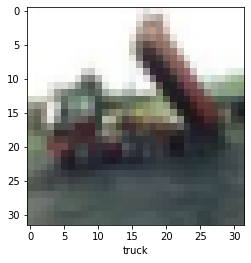

In [11]:
sample_plot(x_train,y_train,2)

**Normalization**

In [7]:
x_train=x_train/255
x_test=x_test/255

**creating the model using ANN**

In [13]:
ann=models.Sequential([
                      layers.Flatten(input_shape=(32,32,3)),
                      layers.Dense(3000, activation='relu'),
                      layers.Dense(1000, activation='relu'),
                      layers.Dense(10, activation='softmax')
])
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 103s 65ms/step - loss: 1.8129 - accuracy: 0.3554
Epoch 2/3
1563/1563 [==============================] - 107s 68ms/step - loss: 1.6227 - accuracy: 0.4273
Epoch 3/3
1563/1563 [==============================] - 106s 68ms/step - loss: 1.5399 - accuracy: 0.4597


**Testing the model**

In [14]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.5594 - accuracy: 0.4481


[1.5593515634536743, 0.4481000006198883]

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(x_test)
y_pred_class=[np.argmax(element) for element in y_pred]

In [16]:
print('Classification report: \n',classification_report(y_test,y_pred_class))

Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.41      0.48      1000
           1       0.69      0.45      0.54      1000
           2       0.32      0.39      0.35      1000
           3       0.41      0.10      0.16      1000
           4       0.54      0.22      0.31      1000
           5       0.37      0.43      0.39      1000
           6       0.41      0.66      0.51      1000
           7       0.34      0.72      0.46      1000
           8       0.63      0.57      0.60      1000
           9       0.52      0.55      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.43     10000
weighted avg       0.48      0.45      0.43     10000



from the above we see the accuracy of ANN is very poor


**creating model using CNN**

In [10]:
cnn=models.Sequential([
                       layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D(2,2),

                       layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D(2,2),
            
                      layers.Flatten(),
                      layers.Dense(150, activation='relu'),
                      layers.Dense(10, activation='softmax')
])
cnn.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4252 - accuracy: 0.4877
Epoch 2/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.0702 - accuracy: 0.6243
Epoch 3/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.9229 - accuracy: 0.6756
Epoch 4/10
1563/1563 [==============================] - 95s 60ms/step - loss: 0.8154 - accuracy: 0.7157
Epoch 5/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.7307 - accuracy: 0.7433
Epoch 6/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.6529 - accuracy: 0.7702
Epoch 7/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.5908 - accuracy: 0.7919
Epoch 8/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.5249 - accuracy: 0.8164
Epoch 9/10
1563/1563 [==============================] - 95s 60ms/step - loss: 0.4688 - accuracy: 0.8348
Epoch 10/10
1563/1563 [==============================] - 94s 60m

when compared to ANN, the CNN gives a very good  accuracy


In [11]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.0590 - accuracy: 0.6891


[1.0589704513549805, 0.6891000270843506]

In [12]:
y_pred=cnn.predict(x_test)

In [13]:
y_pred_class= [np.argmax(i) for i in y_pred]

In [14]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [15]:
y_pred_class[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

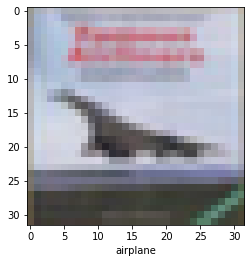

In [17]:
sample_plot(x_test,y_test,3)

In [18]:
classes[y_pred_class[3]]

'airplane'

From the above,the test value and predicted value are equal 

**Classification report**

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=cnn.predict(x_test)
y_pred_class=[np.argmax(element) for element in y_pred]

In [20]:
print('Classification report: \n',classification_report(y_test,y_pred_class))

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.68      0.72      1000
           1       0.84      0.75      0.79      1000
           2       0.51      0.64      0.57      1000
           3       0.57      0.41      0.48      1000
           4       0.61      0.66      0.63      1000
           5       0.62      0.58      0.60      1000
           6       0.73      0.82      0.77      1000
           7       0.74      0.75      0.74      1000
           8       0.76      0.84      0.80      1000
           9       0.76      0.77      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

